# Predicting avocardo price using the prophet library from the facebook

### Installing Prophet

In [1]:
# pip install fbprophet
# or
# conda install -c conda-forge fbprophet

### Importing all the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


### Importing dataset

In [4]:
df = pd.read_csv('avocado.csv')

In [5]:
# Observing the top 5 data present in the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# observing the last 5 dataset
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
# Observing the datatype of all the feature and the total number of not-null dataset present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
# Statistical description of the dataset, To be note only the float or int will be described here.
# We can also use describe function for the categorical data but only categorical data should be present in the dataset for that
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the above statistical analysis we can see total number of data present in the dataset by observing count. Here mean gives the mean value of each feature.
Std is the Standard Deviation of the given feature which describe how much the data are deviated from the mean of that feature.
min gives the minimum value for that feature and max is the maximum value of that feature
25% means that 25% data present in the feature is below that value(for example in the unnamed feature in the dataset, 25 percent of data are below 10)
Or simply we can understand that at 25 percentile of the data there is the value 10. same goes with 50% and 75%.

In [9]:
# Using describe function for the categorical data
df[['type','region']].describe()

,type,region
count,18249,18249
unique,2,54
top,conventional,Pittsburgh
freq,9126,338


In the case of the categorical dataset we can see count which is same as that of numeric, which shows the number of data in the feature.
Unique states that hoe many unique value exist in that feature
top,freq and unique are related that is freq will show the count of the unique classes of that feature and among that which ever class has the highest value that value will be there in the freq and Name of the most freq class will be there in the top

In [10]:
# for example of freq, unique and top
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

Here we can see that in the type feature there are two different category or class that is conventional and organic. By using the function value_counts we can count the frequency of that class in the particular feature so we can see that conventional is repeated 9126 times and organic is repeated 9123 times. Here we can see that conventional has the highest freq so it willl be displayed when we use describe function

In [11]:
#checking null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null value is present in the any of the feature so we don't need handle the missing data here for this particular dataset

In [12]:
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Since this is the timeseries problem and we are going to predict the price in the future so we need to have the data sorted according to the Date. We need to sort them first.

In [13]:
#sorting the dataset with respect to the data
df = df.sort_values('Date')

In [14]:
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [15]:
# since we are concern on price prediction according to the time so we are only taking date and price now
avocardo_df = df[['Date','AveragePrice']]

In [16]:
avocardo_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


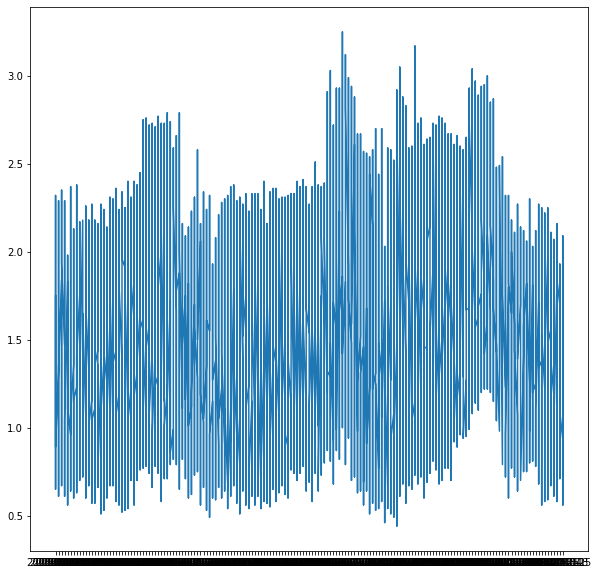

In [17]:
fig = plt.figure(figsize = (10,10))
plt.plot(avocardo_df.Date, avocardo_df.AveragePrice)

### Checking Dataset as balanced or not

Here checking means that since we are considering the price of Avocardo in whole USA so there should be the data or price of avocardo from all part of the USA. If not then we need to predict per area. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

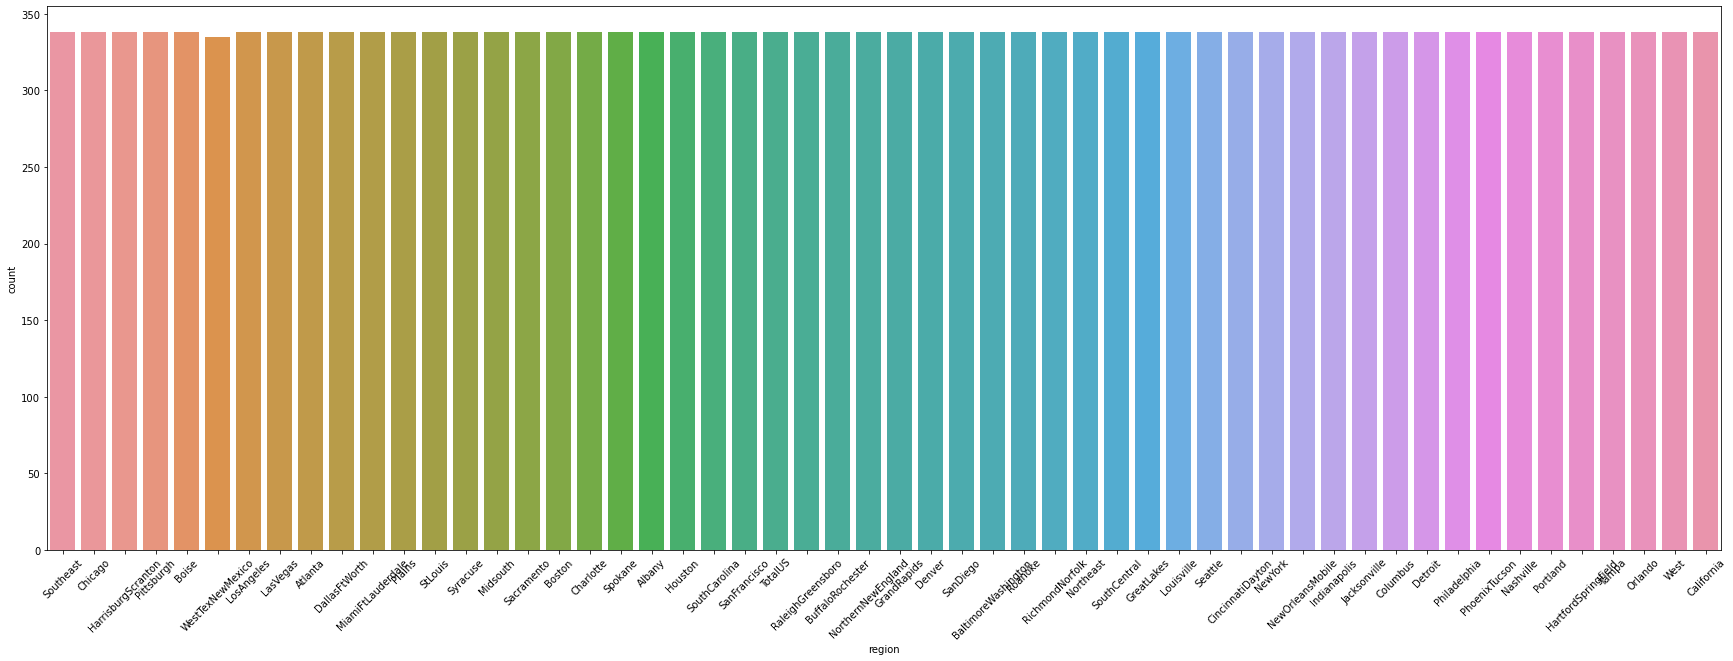

In [18]:
plt.figure(figsize=(30,10))
sns.countplot(df.region)
plt.xticks(rotation = 45)

By observing the above figure we can see all the data were collected equally from the different region of USA so we can represent USA by this Dataset

# Developing dataset for the Prophet

For the Prophet we need to know that the independent feature should have the feature name as ds and for the dependent varible naem of that varible should be y so let us rename our columns

In [19]:
avocardo_df.columns

Index(['Date', 'AveragePrice'], dtype='object')

In [20]:
#Inorder to use Prophet we need to rename our column to ds for the date and y for the target variable
avocardo_df = avocardo_df.rename(columns ={'Date':'ds','AveragePrice':'y'})

In [21]:
avocardo_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# Creating the Model for the prediction

In [22]:
model = Prophet()
model.fit(avocardo_df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#future prediction
future = model.make_future_dataframe(periods = 365)
forecast = model.predict(future)

In [24]:
# it is the dataset created for the future that is extra 365 days
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [25]:
#prediction made by the model for the 365 days
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.883019,1.874387,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.887431,1.842603,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.900398,1.867234,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.877891,1.832675,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.838855,1.808149,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.559464,1.600731,0.979816,1.342384,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.557588,1.607332,0.978407,1.342540,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.559392,1.589077,0.976789,1.342897,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.574750,1.569293,0.975370,1.343698,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


### Visualising the Forecast

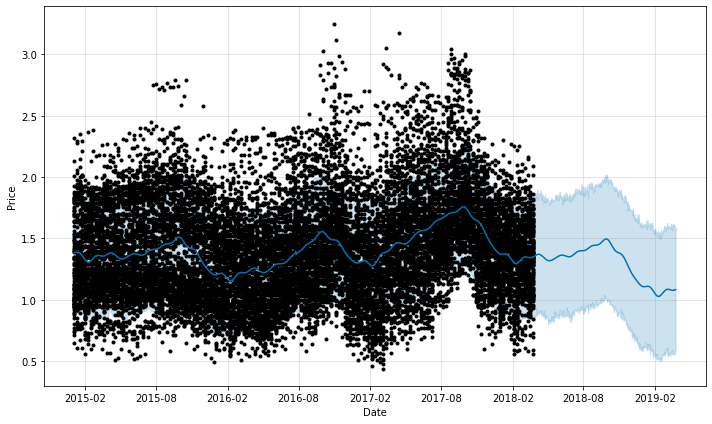

In [26]:
figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Price')

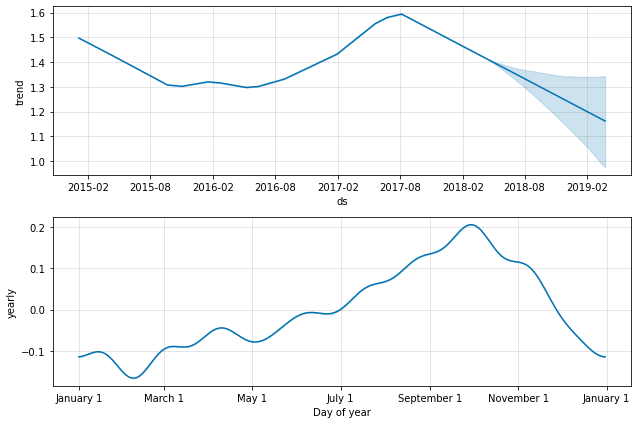

In [27]:
figure = model.plot_components(forecast)

In [28]:
# using cross-validation to evaluate the prediction performance of the model
from fbprophet.diagnostics import cross_validation

In [29]:
df_cv = cross_validation(model, initial = '365 days', period='50 days' , horizon = '100 days')

INFO:fbprophet:Making 15 forecasts with cutoffs between 2016-01-15 00:00:00 and 2017-12-15 00:00:00


Here we have use the automatic cutoffs where as we can also define our own cutoffs to see the performance

In [30]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-17,1.249539,0.801115,1.713834,1.93,2016-01-15
1,2016-01-17,1.249539,0.745382,1.728786,0.87,2016-01-15
2,2016-01-17,1.249539,0.786121,1.718455,1.09,2016-01-15
3,2016-01-17,1.249539,0.757478,1.715059,1.48,2016-01-15
4,2016-01-17,1.249539,0.757375,1.697497,0.88,2016-01-15


In [31]:
# importing performance metrics
from fbprophet.diagnostics import performance_metrics

In [32]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,0.147032,0.383447,0.303224,0.238379,0.184710,0.806206
1,11 days,0.151851,0.389680,0.306129,0.231663,0.182511,0.806198
2,12 days,0.151337,0.389020,0.306037,0.227303,0.180553,0.808352
3,13 days,0.152328,0.390292,0.307088,0.229340,0.185330,0.809888
4,14 days,0.152609,0.390652,0.309907,0.236578,0.189910,0.808141


In [33]:
# importing plot function of cross_validation for visualising it
from fbprophet.plot import plot_cross_validation_metric

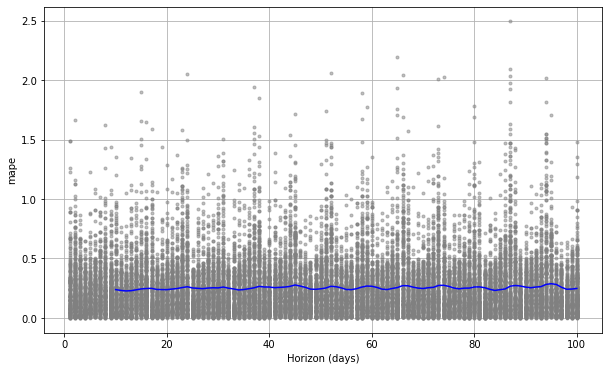

In [34]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots. We see for this forecast that errors around 25% are typical for predictions one month into the future.

In [35]:
import pickle

In [36]:
#savong the model
filename = 'fbprophet_price_predicting_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [37]:
# loading the model
loaded_model = pickle.load(open(filename, 'rb'))

In [38]:
future = loaded_model.make_future_dataframe(periods = 90)

In [39]:
forecast = loaded_model.predict(future)

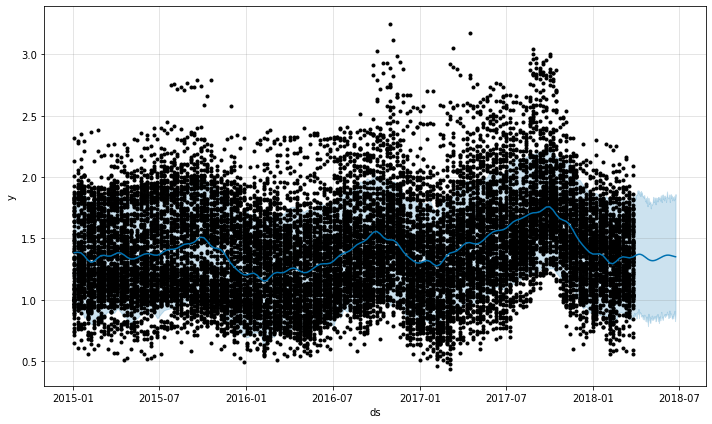

In [51]:
fig = loaded_model.plot(forecast)
ax = fig.gca()

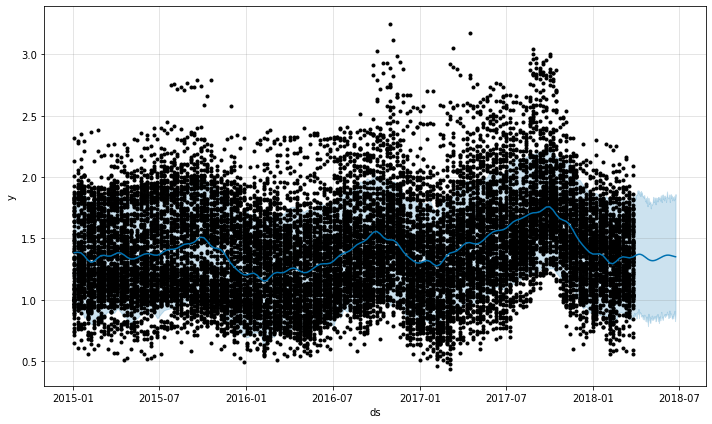

In [40]:
figure = loaded_model.plot(forecast)

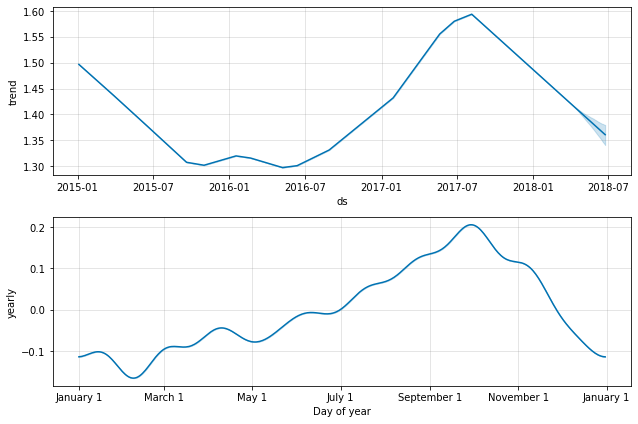

In [41]:
figure = loaded_model.plot_components(forecast)

# predicting price for the particular region

In [42]:
df = pd.read_csv('avocado.csv')

In [43]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [44]:
df.region.value_counts()

Pittsburgh             338
Houston                338
LosAngeles             338
Spokane                338
Philadelphia           338
BuffaloRochester       338
Jacksonville           338
Nashville              338
Denver                 338
Boston                 338
CincinnatiDayton       338
Columbus               338
LasVegas               338
Roanoke                338
Plains                 338
Seattle                338
Indianapolis           338
Orlando                338
Portland               338
GreatLakes             338
NewOrleansMobile       338
West                   338
SouthCentral           338
HartfordSpringfield    338
RichmondNorfolk        338
BaltimoreWashington    338
Tampa                  338
Boise                  338
RaleighGreensboro      338
Midsouth               338
DallasFtWorth          338
SouthCarolina          338
PhoenixTucson          338
Atlanta                338
GrandRapids            338
Louisville             338
Sacramento             338
H

#### let us take a region BuffaloRochester for the analysis for that particular area

In [45]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [46]:
df_BuffaloRochester = df[df['region']=='West']

In [47]:
df_BuffaloRochester

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


In [48]:
df_BuffaloRochester = df_BuffaloRochester[['Date','AveragePrice']]

In [49]:
df_BuffaloRochester = df_BuffaloRochester.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


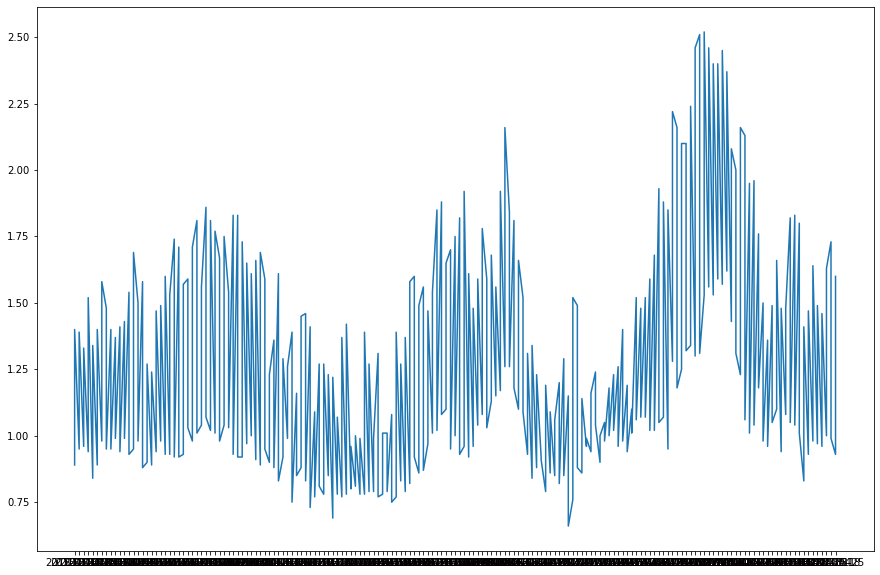

In [50]:
plt.figure(figsize = (15,10))
plt.plot(df_BuffaloRochester.Date, df_BuffaloRochester.AveragePrice)